## Data Functionality: 

- Learn about the data operation, it is very useful when we get to work on time-series data or any dataset with a date attribute in it

## Categorical Data: 

- The basic functionalities and operations that can be performed on categorical data. A good example to learn about the flexibility offered by Python

## Sparse Data:

- A powerful functionality to make efficient use of memory

# Working with Time Series


- Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here:

- Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).

- Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).

- Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

# Native Python dates and times: datetime and dateutil:

- Python's basic objects for working with dates and times reside in the built-in datetime module. Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you can manually build a date using the datetime type:

In [4]:
from datetime import datetime
datetime(year=2015,month=1,day=1)

datetime.datetime(2015, 1, 1, 0, 0)

In [5]:
datetime("2015 july 15th")

TypeError: an integer is required (got type str)

In [9]:
from dateutil import parser
date=parser.parse("4th of july 2021")

In [10]:
date

datetime.datetime(2021, 7, 4, 0, 0)

In [11]:
date1=parser.parse("2021,4th of july")
#not acceptable format

ParserError: Unknown string format: 2021,4th of july

Once you have a datetime object, you can do things like printing the day of the week:



In [13]:
date.strftime('%A')

'Sunday'

The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

# Typed arrays of times: NumPy's datetime64¶


In [14]:
import numpy as np
date=np.array('2021-08-01')

In [15]:
date

array('2021-08-01', dtype='<U10')

In [16]:
date=np.array('2021-08-01',dtype=np.datetime64)

In [17]:
date

array('2021-08-01', dtype='datetime64[D]')

In [18]:
date + np.arange(12)


array(['2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04',
       '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
       '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12'],
      dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it

In [19]:
np.datetime64('2021-08-01')

numpy.datetime64('2021-08-01')

In [20]:
np.datetime64('2021-08-01 12:00')

numpy.datetime64('2021-08-01T12:00')

In [21]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')


numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the NumPy datetime64 documentation, lists the available format codes along with the relative and absolute timespans that they can encode:

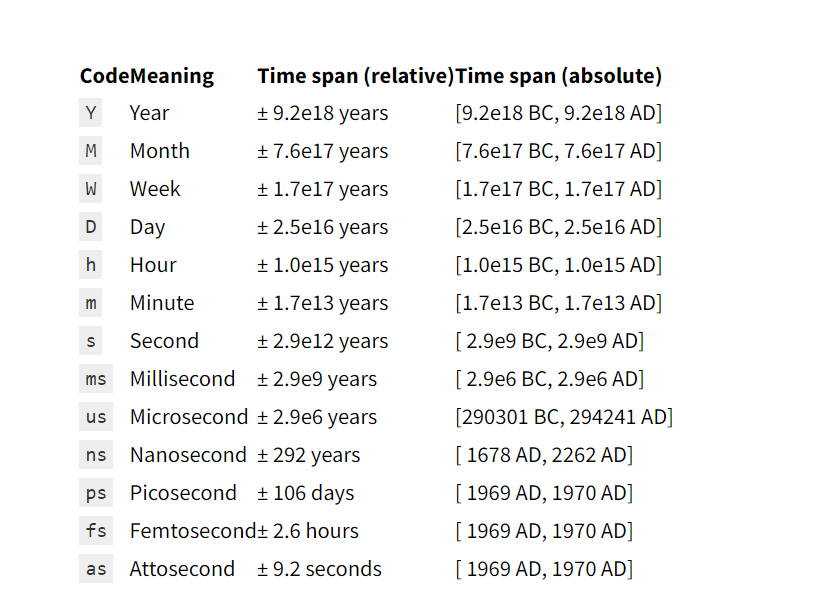

In [22]:
np.datetime64('2015-07-04 12:59:59.50', 'Y')

numpy.datetime64('2015')

In [23]:
np.datetime64('2015-07-04 12:59:59.50', 'D')

numpy.datetime64('2015-07-04')

In [24]:
np.datetime64('2015-07-04 12:59:59.50', 'M')

numpy.datetime64('2015-07')

Finally, we will note that while the datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, it lacks many of the convenient methods and functions provided by datetime and especially dateutil

# Dates and times in pandas: best of both worlds¶

- Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64.

In [25]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [26]:
date.strftime('%A')

'Saturday'

# Pandas Time Series: Indexing by Time

In [27]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas Time Series Data Structures

- For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.

- For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.

- For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

In [28]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [29]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [30]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# Regular sequences: pd.date_range()


- To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: pd.date_range() for timestamps, pd.period_range() for periods, and pd.timedelta_range() for time deltas. We've seen that Python's range() and NumPy's np.arange() turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.

In [32]:
pd.date_range('2015-07-03', '2015-07-10')


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.period_range('2021-08-21','2025-08-21')

PeriodIndex(['2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
             '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
             '2021-08-29', '2021-08-30',
             ...
             '2025-08-12', '2025-08-13', '2025-08-14', '2025-08-15',
             '2025-08-16', '2025-08-17', '2025-08-18', '2025-08-19',
             '2025-08-20', '2025-08-21'],
            dtype='period[D]', length=1462, freq='D')

In [37]:
pd.timedelta_range(0,periods=24,freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00', '0 days 20:00:00',
                '0 days 21:00:00', '0 days 22:00:00', '0 days 23:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offsets

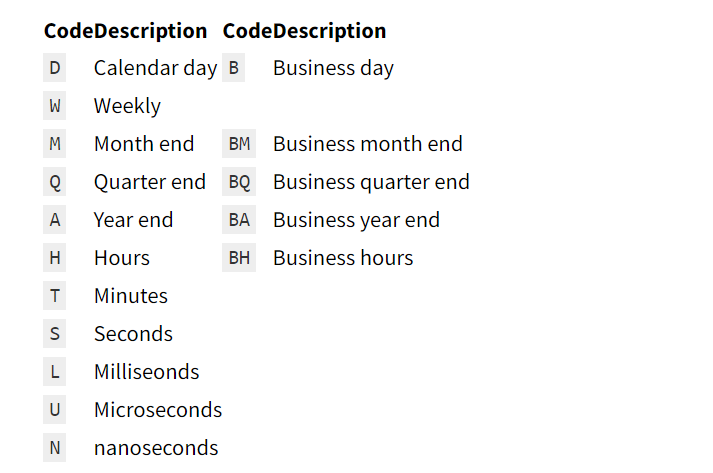

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

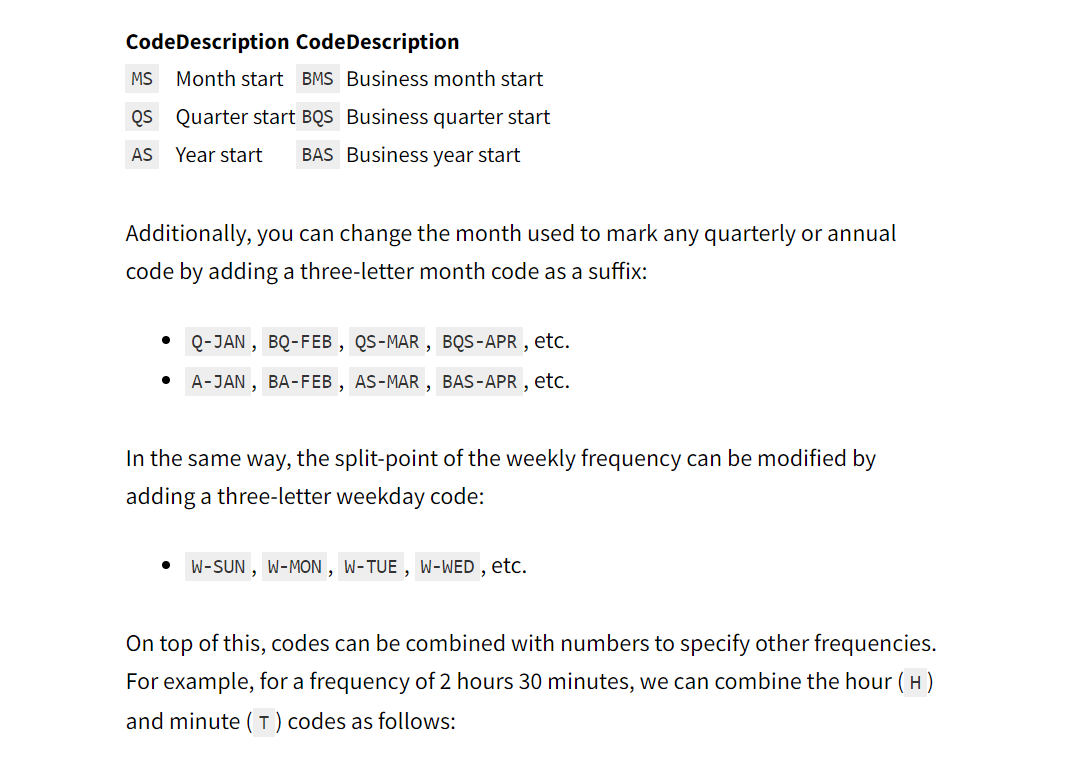

In [38]:
pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [39]:
#we can create a business day offset directly as follows:

from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

- Pandas-datareader package (installable via conda install pandas-datareader), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. Here we will load Google's closing price history:

In [45]:
from pandas_datareader import data

In [54]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [55]:
goog['Close']


Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-23     54.495735
2004-08-24     52.239197
2004-08-25     52.802086
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 2863, dtype: float64

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

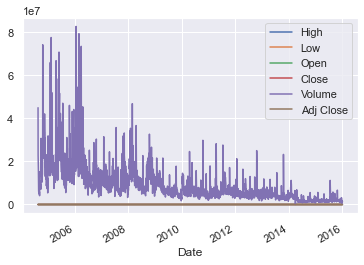

In [57]:
goog.plot();


# Resampling and converting frequencies¶


- One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

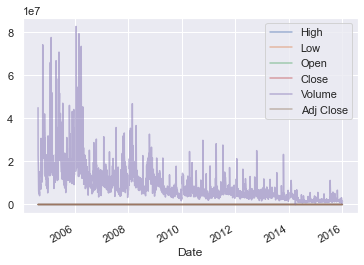

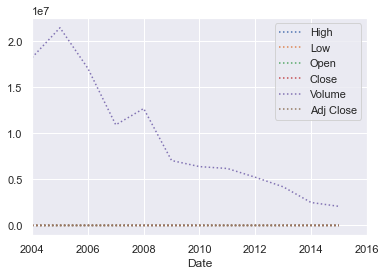

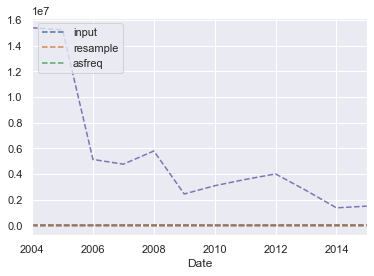

In [58]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year.

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

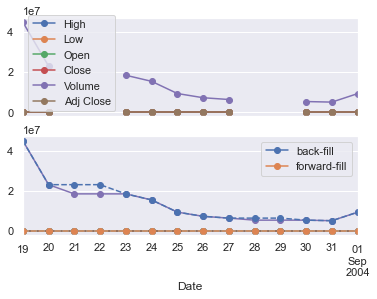

In [59]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

# Categorical Data

In [63]:
gender=pd.Series(['male','female','male','female'],dtype='category')

In [64]:
gender

0      male
1    female
2      male
3    female
dtype: category
Categories (2, object): ['female', 'male']

In [65]:
gender.describe()

count        4
unique       2
top       male
freq         2
dtype: object

In [68]:
df=pd.DataFrame(np.random.randn(10000,4))
df.loc[:9998]=np.nan

In [69]:
df

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
9995,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN


In [76]:
sdf=df.astype(pd.SparseDtype('float',np.nan))
sdf

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
9995,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN


In [77]:
sdf.dtypes

0    Sparse[float64, nan]
1    Sparse[float64, nan]
2    Sparse[float64, nan]
3    Sparse[float64, nan]
dtype: object

In [78]:
sdf.sparse.density

0.0001

Sparse features can cause problems like overfitting and suboptimal results in learning models, and understanding why this happens is crucial when developing models. Multiple methods, including dimensionality reduction, are available to overcome issues due to sparse features.

What are sparse features?
 

Features with sparse data are features that have mostly zero values. This is different from features with missing data. Examples of sparse features include vectors of one-hot-encoded words or counts of categorical data. On the other hand, features with dense data have predominantly non-zero values.

 

What is the difference between sparse data and missing data?
 

When there is missing data, it means that many data points are unknown. On the other hand, if the data is sparse, all the data points are known, but most of them have zero value.

To illustrate this point, there are two types of features. The feature with sparse data has known values (= 0), but the feature with missing data has unknown values (= null). It is unknown what values should be in the null-valued rows.

https://www.kdnuggets.com/2021/01/sparse-features-machine-learning-models.html